# Exploration of dataset

In this notebook, we explore the emotion dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading the data

In [2]:
df = pd.read_csv('../data/emotions.csv', names=['emotion', 'text', 'unnamed'])

In [3]:
df.head()

,emotion,text,unnamed
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [4]:
df[~df['unnamed'].isna()]

,emotion,text,unnamed
1290,anger,I had a quarrel with my parents,I was convinced to be right.
1652,sadness,Death of my father,he died of laryngeal cancer.
7239,joy,I finished my homework,an important task.


We ignore the last column.

In [5]:
df = df[['emotion', 'text']]

In [6]:
df.head()

,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [7]:
df.shape

(7516, 2)

## 2. Exploring the data

### Number of examples by emotion

In [8]:
df['emotion'].value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emotion, dtype: int64

### Mean sentence length by emotion

In [9]:
text_string = 'Hello'

In [10]:
len(text_string)

5

In [11]:
df['TextLength'] = df['text'].map(lambda x: len(x))

In [12]:
df.head()

,emotion,text,TextLength
0,joy,On days when I feel close to my partner and ot...,167
1,fear,Every time I imagine that someone I love or I ...,92
2,anger,When I had been obviously unjustly treated and...,88
3,sadness,When I think about the short time that we live...,139
4,disgust,At a gathering I found myself involuntarily si...,144


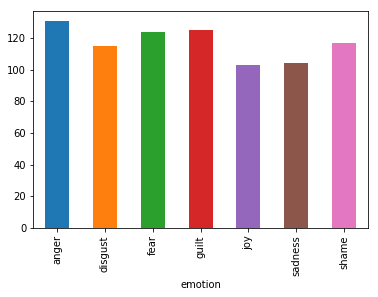

In [13]:
df.groupby('emotion')['TextLength'].mean().plot.bar()

### Most Common words by emotion

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
for e in df['emotion'].unique():
    print('\nFor emotion: ', e)
    emo_df = df[df['emotion'] == e]
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(emo_df['text'].values)
    word_counts = list(zip(vectorizer.get_feature_names(), 
                       np.asarray(X.sum(axis=0)).ravel()))
    sorted_word_counts = sorted(word_counts, 
                                key = lambda x: x[1], 
                                reverse=True)
    print('Most common words are:')
    print(sorted_word_counts[:10])
    


For emotion:  joy
Most common words are:
[('friend', 134), ('got', 119), ('time', 105), ('passed', 101), ('felt', 100), ('happy', 97), ('joy', 93), ('school', 80), ('good', 78), ('university', 77)]

For emotion:  fear
Most common words are:
[('night', 166), ('afraid', 125), ('car', 118), ('fear', 116), ('home', 115), ('felt', 94), ('time', 84), ('friend', 73), ('did', 70), ('house', 70)]

For emotion:  anger
Most common words are:
[('angry', 189), ('friend', 188), ('did', 118), ('time', 82), ('told', 81), ('got', 79), ('felt', 74), ('mother', 73), ('brother', 65), ('people', 65)]

For emotion:  sadness
Most common words are:
[('died', 192), ('friend', 180), ('sad', 170), ('felt', 131), ('time', 99), ('father', 89), ('away', 85), ('death', 81), ('mother', 79), ('years', 75)]

For emotion:  disgust
Most common words are:
[('disgusted', 149), ('saw', 140), ('felt', 112), ('people', 110), ('friend', 101), ('man', 88), ('disgust', 77), ('person', 65), ('did', 64), ('drunk', 56)]

For emoti